# Ising paramagnet

The Hamiltonian of an Ising paramagnet is

$$
\begin{align}
\mathcal{H} = -B\sum_{i=1}^{N}s_i = -BM \tag{1}
\end{align}
$$

where

$$
M = \sum_{i=1}^{N}s_i \tag{2}
$$

is the magnetization.

We start the system with all of the spins aligned up

In [1]:
N        = 100;
tf       = 10000;
time_vec = 1:tf;
ran_vec  = rand(tf);
m_t_vec  = zeros(Int64,tf);
spin_vec = [+1 for i in 1:N];

Then we obtain the time evolution of the magnetization using simple sampling (spin flip with a probability of $1/2$)

In [2]:
m_t_vec[1] = sum(spin_vec)
for t in 2:tf
    ran = Int(ceil(N*ran_vec[t]))
    spin_vec[ran] = -spin_vec[ran]
    m_t_vec[t] = sum(spin_vec)
end

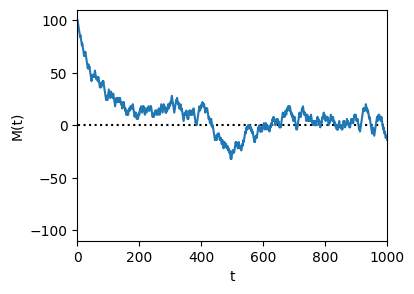

In [3]:
using PyPlot

PyPlot.rc("figure", figsize = (4, 3))

tcut = 1000
plot(time_vec[1:tcut], [0 for x in time_vec[1:tcut]], c="k", ls=":")
plot(time_vec[1:tcut], m_t_vec[1:tcut])

xlim(0,tcut)
ylim(-N-10,N+10)
xlabel("t")
ylabel("M(t)");

The average magnetization is calculated as

$$
\bar{M} = \frac{1}{Z}\sum_t M(t)e^{-\beta\mathcal{H}} \quad\text{where}\quad Z=\sum_t e^{-\beta\mathcal{H}}. \tag{3}
$$

We rewrite this expression as

$$
\bar{M}(x) = \frac{1}{Z(x)}\sum_t M(t)e^{xM(t)} \quad\text{where}\quad Z(x)=\sum_t e^{xM(t)}, \tag{4}
$$

where $x\equiv \beta B$.

In [4]:
function magnetization_av(x::Float64, m_t_vec::Vector{Int64})
    exp_vec = [exp(x*m) for m in m_t_vec]
    z = sum(exp_vec)
    m_av::Float64 = 0.0
    for m ∈ m_t_vec
        m_av += m * exp(x*m)
    end
    m_av = m_av / z
    return m_av
end;

In [5]:
x_vec = [x for x ∈ -5.0:0.1:5.0]
m_av_vec = [magnetization_av(x, m_t_vec[tcut:tf])/N for x ∈ x_vec]
m_theory = [tanh(x) for x ∈ x_vec]; 

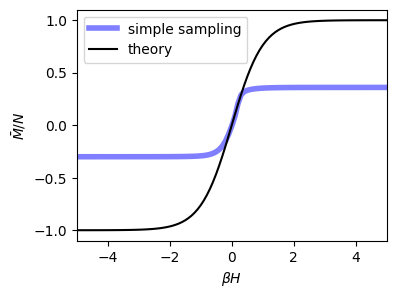

In [6]:
PyPlot.rc("figure", figsize = (4, 3))

plot(x_vec, m_av_vec, label="simple sampling", c="b", alpha=0.5, lw=4)
plot(x_vec, m_theory, label="theory", c="k")

xlim(first(x_vec), last(x_vec))
xlabel(L"\beta H")
ylabel(L"\bar{M}/N")
legend();

The simple sampling method samples most of the values around $M=0$. Therefore we will never see larger values of $M$ corresponding to configurations where $\beta B$ is large.